NAME: ABHISHEK GUPTA
    
UID: 20217000W7
    
BATCH: TY-CSE-DS-B
    
EXPERIMENT NO: 8

AIM: Implement Clustering algorithm

Clustering algorithms in machine learning are techniques used to group similar data points together based on certain criteria. Here's a theoretical overview of clustering algorithms:

K-means Clustering:

Description: K-means is one of the most popular clustering algorithms. It partitions the data into K clusters where each data point belongs to the cluster with the nearest mean.
Working: It starts by randomly initializing K cluster centroids. Then, it iteratively assigns each data point to the nearest centroid and recalculates the centroids based on the mean of the data points assigned to each cluster.
Advantages: Simple to implement, scales well to large datasets.
Disadvantages: Sensitive to the initial choice of centroids, may converge to local optima.
Hierarchical Clustering:

Description: Hierarchical clustering builds a hierarchy of clusters. It doesn't require the number of clusters to be specified beforehand.
Working: It starts by treating each data point as a singleton cluster. Then, it iteratively merges the closest clusters until all data points are in a single cluster or until a stopping criterion is met.
Advantages: No need to specify the number of clusters beforehand, provides a dendrogram for visualization.
Disadvantages: Computationally expensive, not suitable for large datasets.
Density-based Clustering (DBSCAN):

Description: DBSCAN groups together closely packed points based on density.
Working: It defines clusters as dense regions separated by low-density regions. It starts with an arbitrary point and expands the cluster by including all neighboring points within a specified distance epsilon. It can handle noise by labeling points that lie in low-density regions as outliers.
Advantages: Can find arbitrarily shaped clusters, robust to outliers.
Disadvantages: Sensitive to the choice of epsilon and minimum points, struggles with clusters of varying densities.
Gaussian Mixture Models (GMM):

Description: GMM represents the data as a mixture of several Gaussian distributions.
Working: It assumes that the data is generated from a mixture of several Gaussian distributions with unknown parameters. It uses the Expectation-Maximization (EM) algorithm to iteratively estimate the parameters of the Gaussian distributions.
Advantages: Can model complex cluster shapes, provides soft assignments.
Disadvantages: Sensitive to the choice of initial parameters, can converge to local optima.
Agglomerative Clustering:

Description: Agglomerative clustering is a bottom-up approach where each data point starts as its own cluster and clusters are successively merged.
Working: It starts by treating each data point as a singleton cluster and then merges the closest clusters until only one cluster remains.
Advantages: No need to specify the number of clusters beforehand, can handle large datasets.
Disadvantages: Computationally expensive, doesn't scale well to very large datasets.
Each clustering algorithm has its own strengths and weaknesses, and the choice of algorithm depends on the nature of the data and the specific requirements of the problem at hand. It's often useful to try multiple algorithms and compare their performance empirically.

In [22]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('/content/Mall_Customers.csv')
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

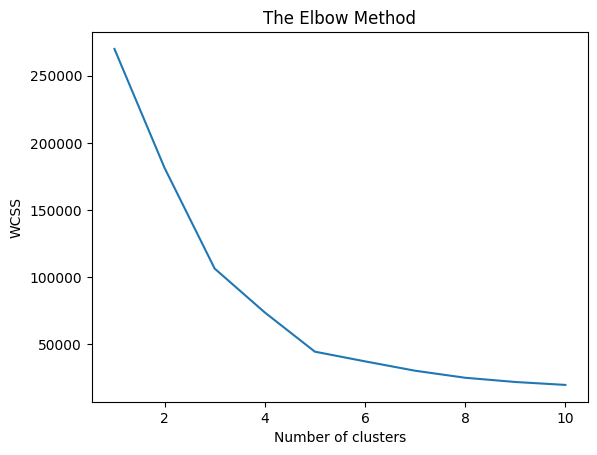

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


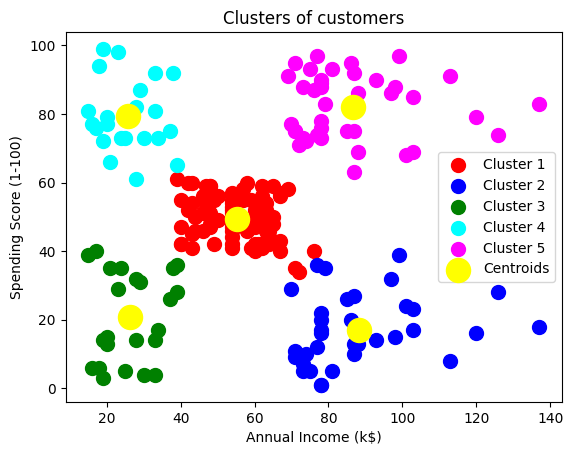

In [23]:
X = dataset.iloc[:, [3, 4]].values


# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

# Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


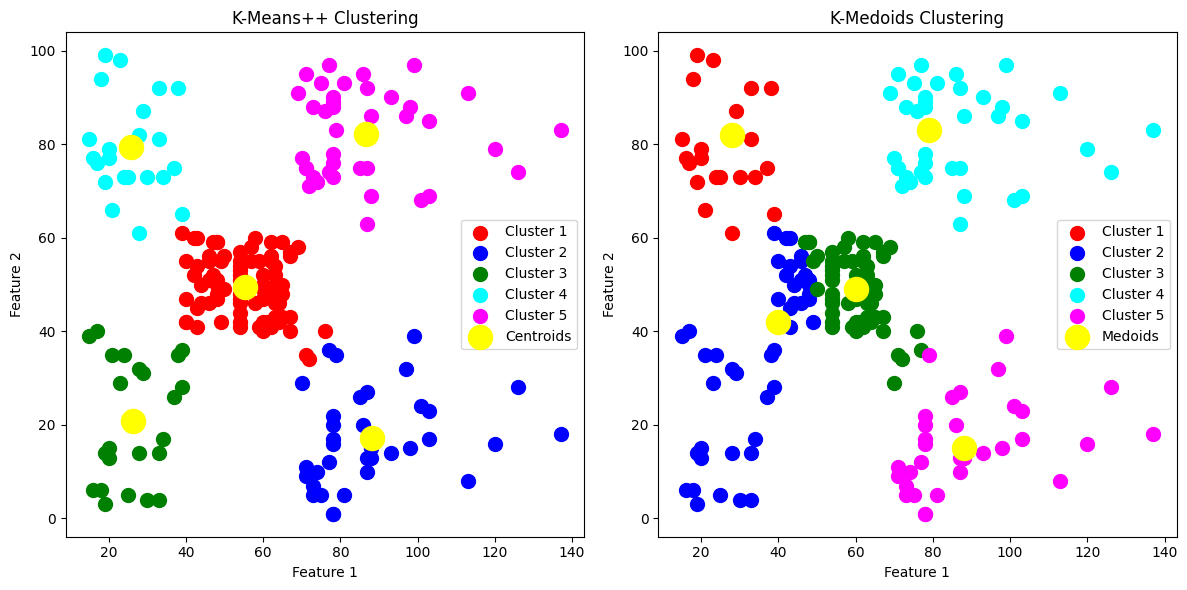

In [24]:
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids  # Import KMedoids from scikit-learn-extra

# K-Means++ Clustering
kmeans_pp = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans_pp = kmeans_pp.fit_predict(X)

# K-Medoids Clustering
kmedoids = KMedoids(n_clusters=5, random_state=42)
y_kmedoids = kmedoids.fit_predict(X)

# Visualizing K-Means++ Clustering
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(X[y_kmeans_pp == 0, 0], X[y_kmeans_pp == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X[y_kmeans_pp == 1, 0], X[y_kmeans_pp == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(X[y_kmeans_pp == 2, 0], X[y_kmeans_pp == 2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(X[y_kmeans_pp == 3, 0], X[y_kmeans_pp == 3, 1], s=100, c='cyan', label='Cluster 4')
plt.scatter(X[y_kmeans_pp == 4, 0], X[y_kmeans_pp == 4, 1], s=100, c='magenta', label='Cluster 5')
plt.scatter(kmeans_pp.cluster_centers_[:, 0], kmeans_pp.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')
plt.title('K-Means++ Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()

# Visualizing K-Medoids Clustering
plt.subplot(1, 2, 2)
plt.scatter(X[y_kmedoids == 0, 0], X[y_kmedoids == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X[y_kmedoids == 1, 0], X[y_kmedoids == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(X[y_kmedoids == 2, 0], X[y_kmedoids == 2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(X[y_kmedoids == 3, 0], X[y_kmedoids == 3, 1], s=100, c='cyan', label='Cluster 4')
plt.scatter(X[y_kmedoids == 4, 0], X[y_kmedoids == 4, 1], s=100, c='magenta', label='Cluster 5')
plt.scatter(kmedoids.cluster_centers_[:, 0], kmedoids.cluster_centers_[:, 1], s=300, c='yellow', label='Medoids')
plt.title('K-Medoids Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()

plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

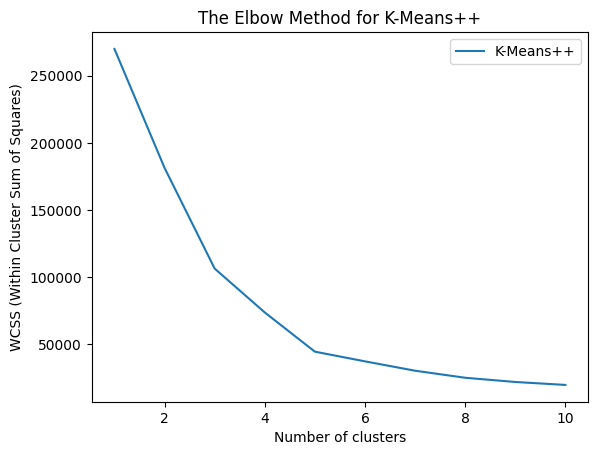

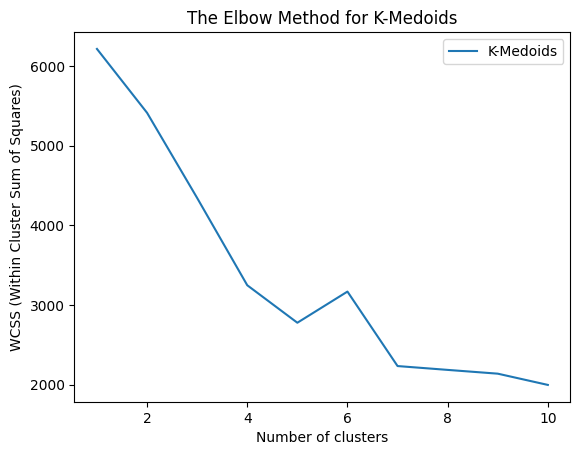

In [25]:
# Using the elbow method to find the optimal number of clusters for K-Means++
wcss_kmeans_pp = []
for i in range(1, 11):
    kmeans_pp = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans_pp.fit(X)
    wcss_kmeans_pp.append(kmeans_pp.inertia_)

# Using the elbow method to find the optimal number of clusters for K-Medoids
wcss_kmedoids = []
for i in range(1, 11):
    kmedoids = KMedoids(n_clusters=i, random_state=42)
    kmedoids.fit(X)
    wcss_kmedoids.append(kmedoids.inertia_)

# Plotting the elbow method graph for K-Means++
plt.plot(range(1, 11), wcss_kmeans_pp, label='K-Means++')
plt.title('The Elbow Method for K-Means++')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS (Within Cluster Sum of Squares)')
plt.legend()
plt.show()

# Plotting the elbow method graph for K-Medoids
plt.plot(range(1, 11), wcss_kmedoids, label='K-Medoids')
plt.title('The Elbow Method for K-Medoids')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS (Within Cluster Sum of Squares)')
plt.legend()
plt.show()